# Data Analysis and Visualizations 

In this  notebook we will first analyze the data and understand the corrilation between various factors and house price.  

# Step 1 : Get the data

Download the compitition deta from kaggle 

In [1]:
 !pip install -q kaggle

In [2]:
# Upload your kaggle api key file 

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [3]:
!chmod 600 /root/.kaggle/kaggle.json   

In [4]:
!kaggle datasets download -d farhankarim1/usa-house-prices

  0% 0.00/363k [00:00<?, ?B/s]
100% 363k/363k [00:00<00:00, 53.0MB/s]


In [5]:
!unzip /content/usa-house-prices.zip

Archive:  /content/usa-house-prices.zip
  inflating: USA_Housing.csv         


# Step 2 : Exploratory data analysis

In [6]:
#imports 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

In [7]:
df = pd.read_csv("/content/USA_Housing.csv")

In [8]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# A. Check the distribution of the price column

In [10]:
df.Price.describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


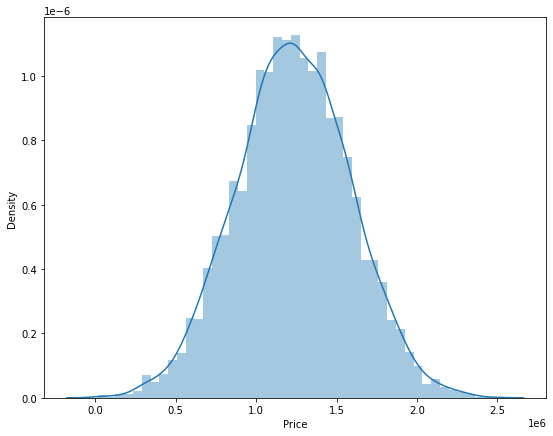

In [11]:
fig_dims = (9, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df['Price'])

From the above plot we can say that the distribution of different home prices is nearly normal. which is good sign. 

# B. Find Corrliations between various features 

In [12]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [13]:
cor_df = df.corr()

cor_df


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


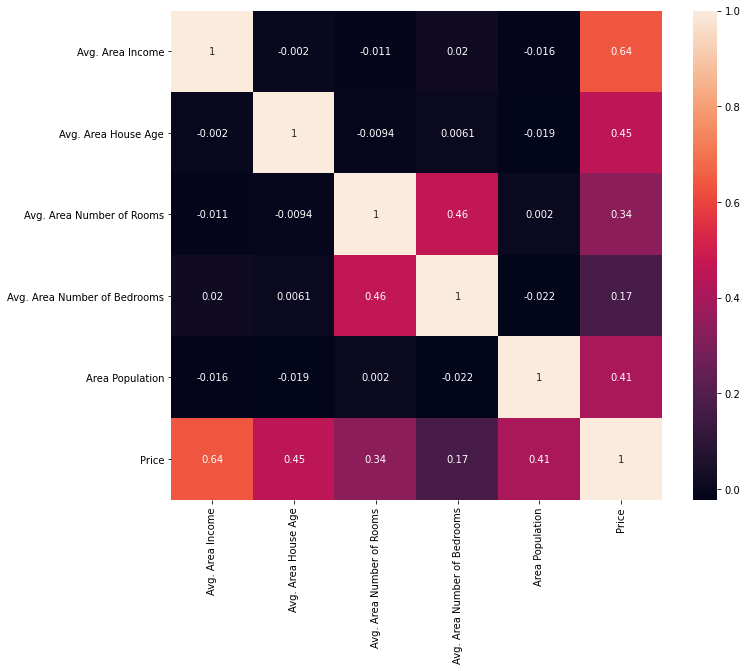

In [14]:
fig_dims = (11, 9)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),annot=True)

In [15]:
print("Corrlilation between various features and the price \n\n")
cor_df["Price"]

Corrlilation between various features and the price 




Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Area Population                 0.408556
Price                           1.000000
Name: Price, dtype: float64

Conclusion : Avg. Area Income , Avg. Area House Age  and Area Population are some of the most valuable features while prediction the price of house 